# Data Science & ML 
## Case Study 3


In [32]:
import pandas as pd

# Load the dataset FyntraCustomerData.csv.
data = pd.read_csv('FyntraCustomerData.csv')

print("Info of the dataset:")
print(data.info())
print("-"*50) 
print("Check for null values in the dataset:")
print(data.isnull().sum())
print("-"*50) 
print("Print the first rows from the dataset:")
print(data.head())


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None
--------------------------------------------------
Check for null values in the dataset:
Email                   0
Address                 0
Avatar                  0
Avg_Session_Length      0
Time_on_App             0
Time_on_Website         0
Length_of_Membership    0
Yearly_Amount_Spent     0
dtype: int

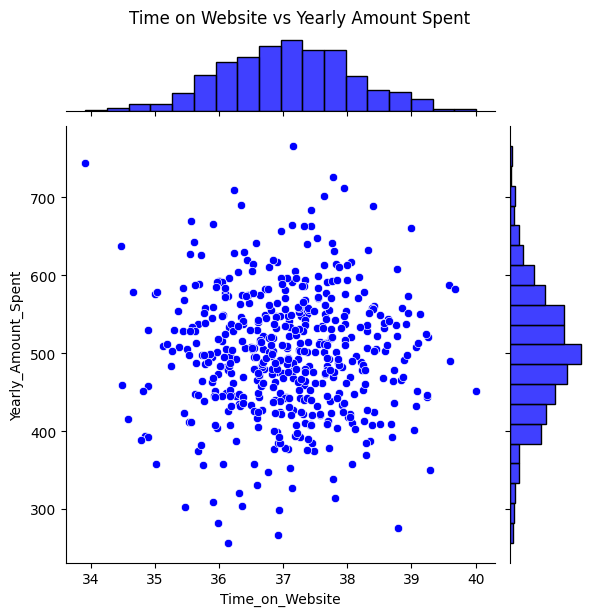

In [33]:
# 1. Compare Time on Website and Yearly Amount Spent
import seaborn as sns
import matplotlib.pyplot as plt

# Jointplot: Time on Website vs Yearly Amount Spent
sns.jointplot(
    x="Time_on_Website", 
    y="Yearly_Amount_Spent", 
    data=data, 
    kind="scatter", 
    color="blue"
)
plt.suptitle('Time on Website vs Yearly Amount Spent', y=1.02)
plt.show()




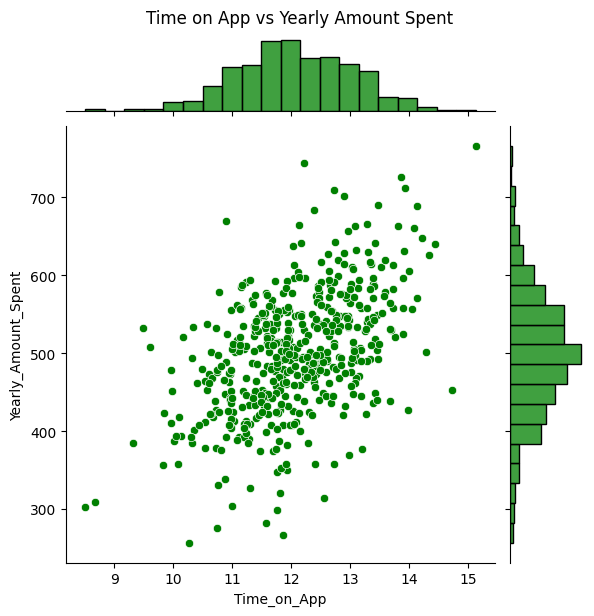

In [34]:
# 2. Compare Time on App and Yearly Amount Spent

# Jointplot: Time on App vs Yearly Amount Spent
sns.jointplot(
    x="Time_on_App", 
    y="Yearly_Amount_Spent", 
    data=data, 
    kind="scatter", 
    color="green"
)
plt.suptitle('Time on App vs Yearly Amount Spent', y=1.02)
plt.show()



In [35]:
# Comparison of Correlations

website_corr = data['Time_on_Website'].corr(data['Yearly_Amount_Spent'])
app_corr = data['Time_on_App'].corr(data['Yearly_Amount_Spent'])

print(f"Correlation between Time on Website and Yearly Amount Spent: {website_corr:.2f}")
print(f"Correlation between Time on App and Yearly Amount Spent: {app_corr:.2f}")


Correlation between Time on Website and Yearly Amount Spent: -0.00
Correlation between Time on App and Yearly Amount Spent: 0.50


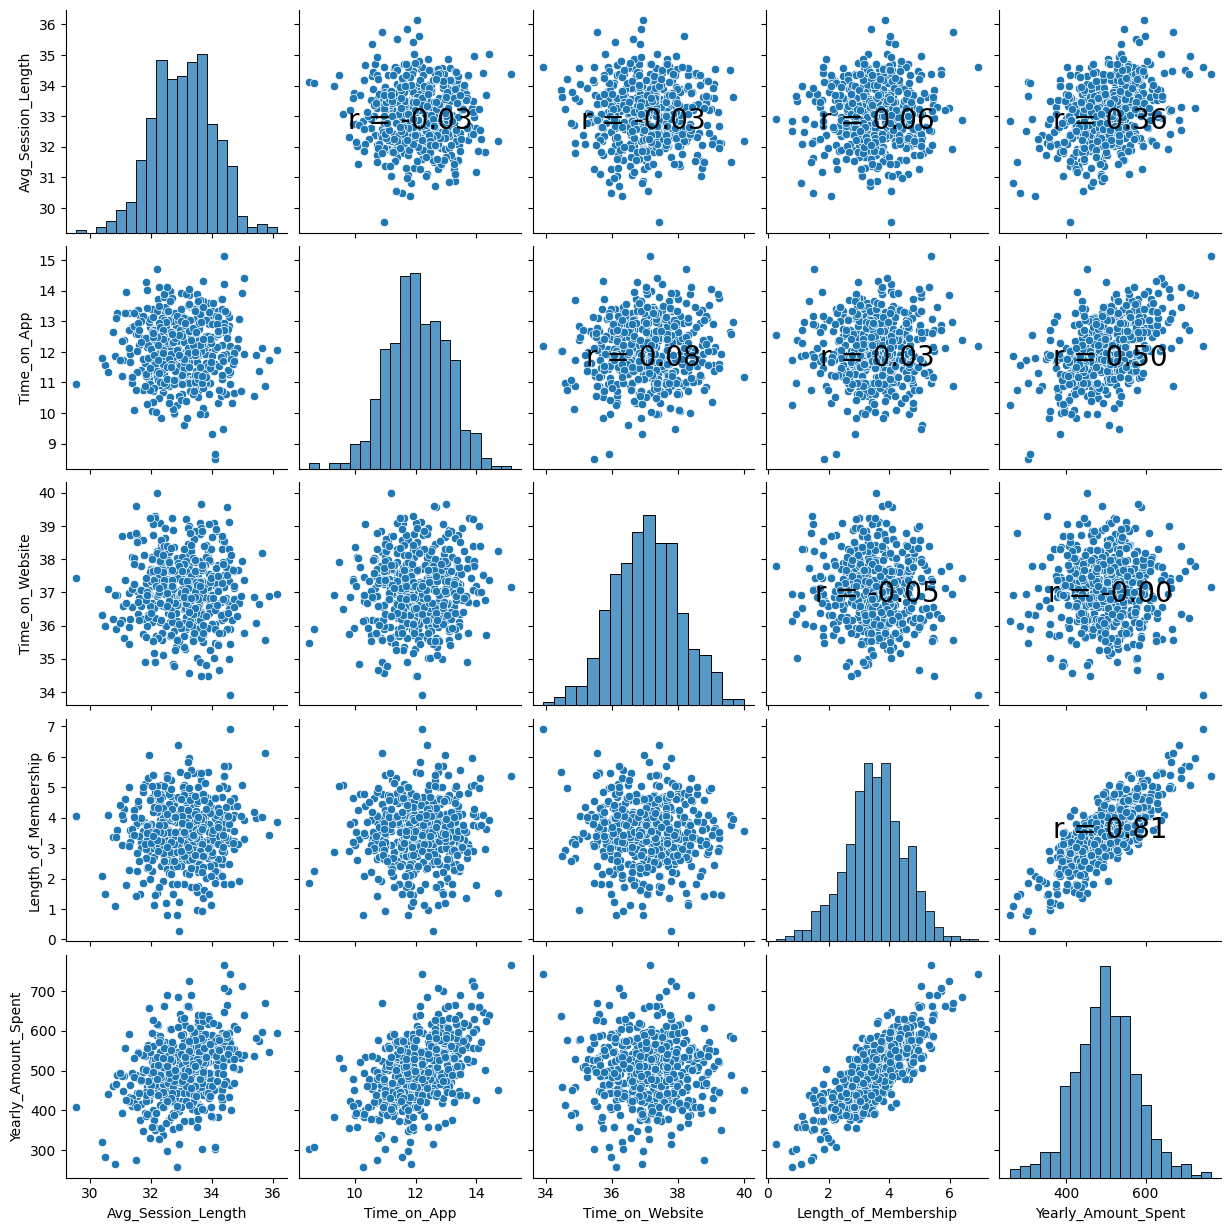

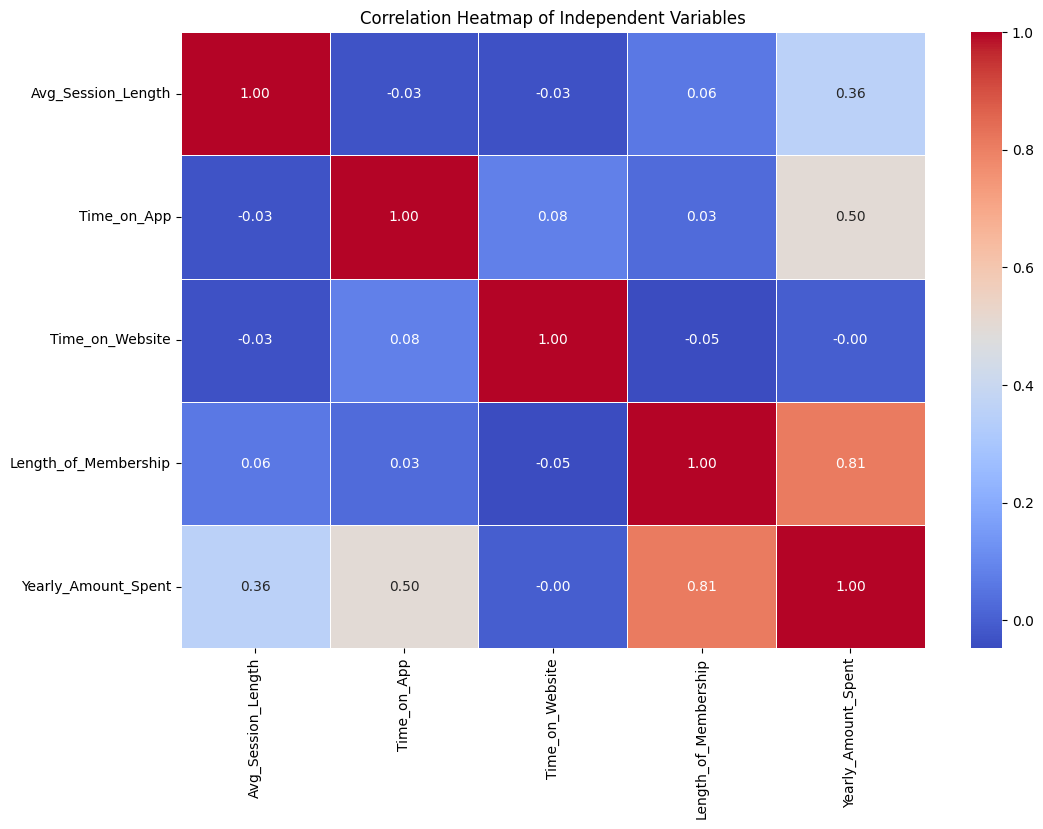

In [36]:
# 3. Pairplot to Explore Relationships
# Objective: Visualize relationships across the dataset to identify the feature most correlated with Yearly_Amount_Spent.

import numpy as np

# Define a function to annotate correlation values
def annotate_corr(x, y, **kwargs):
    """Annotate the correlation coefficient in the upper triangle of pairplot."""
    r = np.corrcoef(x, y)[0, 1]  # Compute correlation coefficient
    ax = plt.gca()  # Get the current axis
    ax.annotate(f"r = {r:.2f}", xy=(0.5, 0.5), xycoords=ax.transAxes, 
                ha='center', va='center', fontsize=20, color='black')

# Create the pairplot and apply the custom correlation annotation
pairplot = sns.pairplot(data, kind="scatter")

# Map the correlation annotation function to the upper triangle
pairplot.map_upper(annotate_corr)

# Create a pairplot
# Notice that: sns.pairplot automatically identifies columns with numeric data types (e.g., int, float) and excludes non-numeric columns (e.g., object, string).
# sns.pairplot(data)
plt.show()

# Compute the correlation matrix to get a better idea
correlation_matrix = data.select_dtypes(include=['float64']).corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Independent Variables")
plt.show()


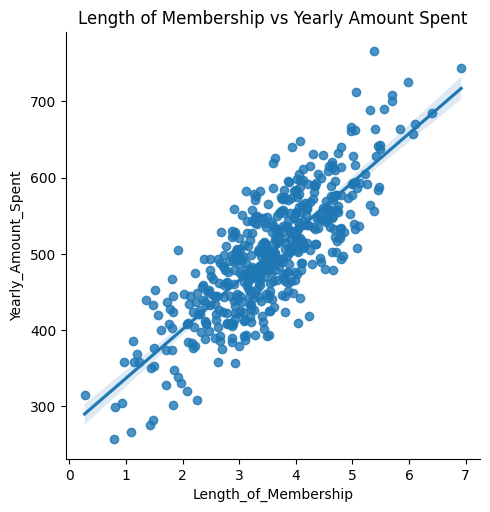

In [37]:
# 4. Linear Model Plot
# Objective: Examine the relationship between Length_of_Membership and Yearly_Amount_Spent using a linear regression plot.

# Linear regression plot
sns.lmplot(x='Length_of_Membership', y='Yearly_Amount_Spent', data=data)
plt.title('Length of Membership vs Yearly Amount Spent')
plt.show()



In [38]:
# 5.  Train-Test Split and Random State
# Objective: Split the data into training and testing sets and explain the purpose of random_state=85.

from sklearn.model_selection import train_test_split

# Define predictors (X) and target variable (y)
X = data[['Avg_Session_Length', 'Time_on_App', 'Time_on_Website', 'Length_of_Membership']]
y = data['Yearly_Amount_Spent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=85)

print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)



Training Data Shape: (375, 4)
Test Data Shape: (125, 4)


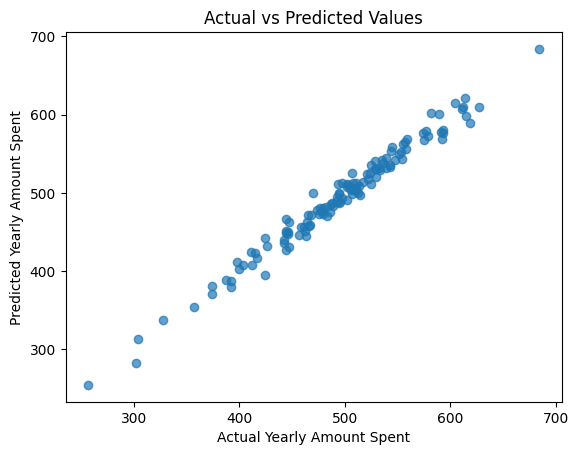

[25.8900575  39.10639479  0.51713276 61.36373131]


In [39]:
#6. Predict and Scatter Plot
# Objective: Train a linear regression model, predict on the test set, and compare actual vs. predicted values.


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Values')
plt.show()

print(model.coef_)


In [40]:
# 7. Root Mean Squared Error (RMSE)
# Objective: Calculate the RMSE to evaluate the model's performance.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# Root Mean Squared Error (RMSE)
# Objective: # Calculate the RMSE to evaluate the model's performance.
# Analysis: # RMSE provides the average magnitude of prediction errors in the same units as Yearly_Amount_Spent.
# A lower RMSE indicates better model performance.

# RMSE: A low value (e.g., <= 10) indicates good predictive accuracy.

Root Mean Squared Error: 10.32


### **1. Mean Squared Error (MSE)**

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

#### **Where:**
* 𝑛: Number of data points.
* $𝑦_𝑖$ : Actual value of the target variable for the 𝑖𝑡ℎ observation.
* $\hat{y}_i$ Predicted value by the model for the 𝑖𝑡ℎ observation.

#### **Meaning:**
* MSE is the average squared difference between the actual and predicted values.
* It penalizes larger errors more heavily due to squaring.
* A lower MSE indicates better model performance, with 0 being the ideal (perfect predictions).

#### **Interpretation:**
* MSE is in the same units as the square of the target variable.
* For example, if rating is measured in points, MSE is in points squared.
* While useful for comparison, it lacks intuitive interpretability since it doesn’t represent actual error magnitude.
